In [1]:
from preprocessing import read_tfrecords

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-07 17:32:46.016046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X,y = read_tfrecords(file_pattern="Data/next_day_wildfire_spread/next_day_wildfire_spread*", batch_size=200)

2024-04-07 17:33:10.160602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [19]
	 [[{{node Placeholder/_0}}]]
2024-04-07 17:33:10.160960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [19]
	 [[{{node Placeholder/_0}}]]


In [9]:
X.shape
i = 0

IndexError: index 1 is out of bounds for dimension 0 with size 1

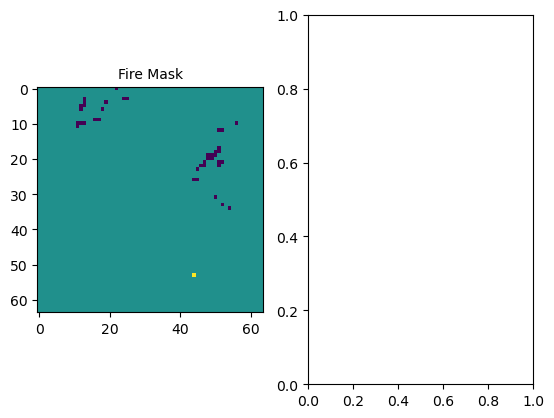

In [94]:
import matplotlib.pyplot as plt
from fire_direction import calculate_cosine_similarity
fig, (ax1, ax3) = plt.subplots(1, 2)

# Plotting the images
img1 = ax1.imshow(X[i, :, :, 11])
ax1.set_title("Fire Mask", fontsize=10)

#img2 = ax2.imshow(X[i, :, :, 1])
#ax2.set_title("Wind Direction", fontsize=10)
# Adding colorbar to ax2
#fig.colorbar(img2, ax=ax2)

test = apply_cosine_similarity(X[i, :, :, 11],X[i, :, :, 1], calculate_cosine_similarity)

img3 = ax3.imshow(test)
ax3.set_title("Direction", fontsize=10)

plt.show()

i += 1

In [60]:
i -= 1

In [77]:
t = list(X_test_fire)
t.append(X_test_wind)

AttributeError: 'list' object has no attribute 'numpy'

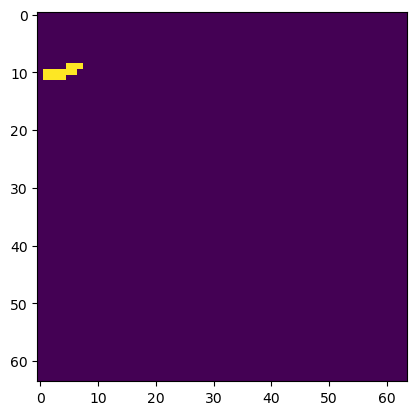

In [34]:
plt.imshow(X_test_fire)

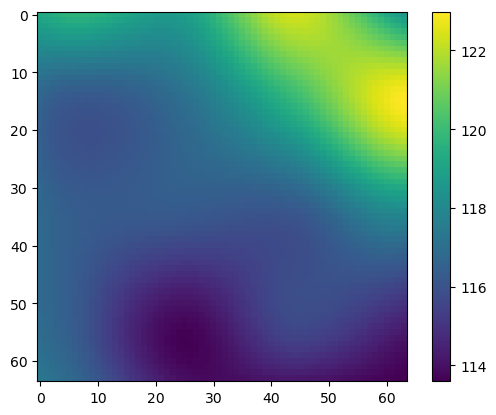

In [31]:
plt.imshow(X_test_wind)
plt.colorbar()

In [32]:
test = apply_cosine_similarity(X_test_fire,X_test_wind, calculate_cosine_similarity)

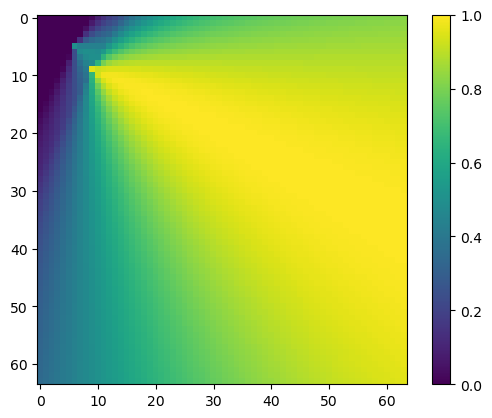

In [33]:
plt.imshow(test)
plt.colorbar()

In [205]:
import numpy as np

def calculate_cosine_similarity(x1, y1, x2, y2, direction_deg):
    # Calculate the vectors from the first datapoint to the second datapoint and the direction
    direction_deg = (180 - direction_deg) % 360
    vec_to_point = np.array([x2 - x1, y2 - y1])
    vec_direction = np.array([np.cos(np.radians(direction_deg)), np.sin(np.radians(direction_deg))])
    
    # Calculate the cosine similarity
    cosine_similarity = np.dot(vec_to_point, vec_direction) / (np.linalg.norm(vec_to_point) * np.linalg.norm(vec_direction))

    if (cosine_similarity <0):
        cosine_similarity = 0

    return cosine_similarity

# Example usage:
# First datapoint
x1 = 0
y1 = 0
direction_deg = 90  # Direction of the first datapoint in degrees

# Second datapoint
#x2, y2 = np.meshgrid(np.arange(64), np.arange(64))
x2 = 0
y2 = 400
# Calculate the normalized cosine similarity
similarity = calculate_cosine_similarity(x1, y1, x2, y2, direction_deg)

# Print the result
print("Normalized similarity:", similarity)


Normalized similarity: 1.0


Result Matrix:


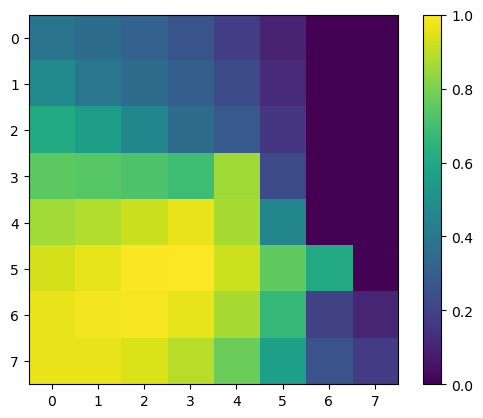

In [67]:
import numpy as np

def apply_cosine_similarity(firemask,direction_matrix2, func):
    # Find indices where m1 equals 1
    indices = np.argwhere(firemask == 1)

    if indices.size == 0:
        return np.zeros((direction_matrix2.shape[0], direction_matrix2.shape[1]))

    res_list = list()

    for i, sublist in enumerate(indices):
        #x, y = np.meshgrid(np.arange(64), np.arange(64))
        x_f = sublist[0] # 0
        y_f = sublist[1] # 0
        wind_direction = direction_matrix2[x_f,y_f] # 45

        result = np.zeros((direction_matrix2.shape[0], direction_matrix2.shape[1]))

        for x in range(direction_matrix2.shape[0]):
            for y in range(direction_matrix2.shape[1]):
                res = func(x_f,y_f,x,y, wind_direction)
                result[y,x] = res
        result[np.isnan(result)] = 1
        res_list.append(result)

    sum_arrays = sum(res_list)
    min_val = np.min(sum_arrays)
    max_val = np.max(sum_arrays)

    normalized_array = (sum_arrays - min_val) / (max_val - min_val)
    
    return normalized_array
    

# Example matrices
m1 = np.array([[0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,1,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,1,0,0],
               [0, 0, 0,0,0,0,0,0]])

m2 = np.array([[0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,57,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0]])

# Apply the function to matrices m1 and m2
direction = apply_cosine_similarity(m1, m2, calculate_cosine_similarity)

# Print the result
print("Result Matrix:")
plt.imshow(direction, cmap='viridis') 
plt.colorbar()

In [262]:
def add_fire_direction_to_tensor(
        tensor: torch.Tensor,
        wind_direction_index: int,
        fire_mask_index: int) -> torch.Tensor:

    fire_mask = tensor[:, :, :, fire_mask_index].numpy()
    wind_direction = tensor[:, :, :, wind_direction_index].numpy()

    tensor_shape = (64, 64, 1)
    fire_direction_final = torch.empty((tensor.shape[0],) + tensor_shape)

    for i in range(tensor.shape[0]):
        wind_influence = apply_cosine_similarity(fire_mask[i,:,:], wind_direction[i,:,:],calculate_cosine_similarity)
        wind_influence = torch.from_numpy(wind_influence)
        wind_influence = wind_influence.unsqueeze(-1) # Unsqueeze adds dimension m to make it compatible
        fire_direction_final[i] = wind_influence

    tensor = torch.cat([fire_direction_final, tensor], dim=-1)

    return tensor

In [263]:
tt = add_fire_direction_to_tensor(X,1,11)

/var/folders/7l/yk4r99455ws31nbs3m733gx40000gn/T/ipykernel_27141/4165468669.py:10: RuntimeWarning: invalid value encountered in double_scalars
  cosine_similarity = np.dot(vec_to_point, vec_direction) / (np.linalg.norm(vec_to_point) * np.linalg.norm(vec_direction))


In [271]:
import numpy as np

def apply_cosine_similarity(firemask, direction_matrix2, func):
    # Find indices where firemask equals 1
    indices = np.argwhere(firemask == 1)

    # Create an empty array to store results
    result = np.zeros_like(direction_matrix2)

    for i, idx in enumerate(indices):
        # Extract indices for current position
        x_f = idx[0] # 0
        y_f = idx[1] # 0

        # Extract wind direction for current index
        wind_direction = direction_matrix2[x_f, y_f]

        # Calculate similarities for each cell
        xx, yy = np.meshgrid(np.arange(direction_matrix2.shape[0]), np.arange(direction_matrix2.shape[1]))
        res = func(x_f, y_f, xx, yy, wind_direction)

        # Set NaN values to 1
        res[np.isnan(res)] = 1

        # Add the calculated similarity to the result
        result += res

    # Normalize the result
    min_val = np.min(result)
    max_val = np.max(result)
    normalized_array = (result - min_val) / (max_val - min_val)

    return normalized_array


In [101]:
firemask = np.array([[0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0],
               [0, 0, 0,0,0,0,0,0]])
np.argwhere(firemask == 1).size == 0

True